<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터구성
*   Pregnancies : 임신횟수
*   Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
*   BloodPressure : 이완기 혈압
*   SkinThickness : 삼두근 피부 주름 두께, 체지방 추정 사용되는 값
*   Insulin : 2시간 혈청 인슐린
*   BMI : 체질량 지수
*   DiabetesPedigreeFunction : 당뇨병 혈통 기능
*   Age : 나이
*   Outcome: 768개 중 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0임







## 2. 필요한 라이브러리 로드

In [1]:
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 3. 데이터셋 로드

In [2]:
df = pd.read_csv("/content/drive/MyDrive/boostcourse_data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4. 학습,예측 데이터셋 나누기

In [4]:
#8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다
split_count = int(df.shape[0] * 0.8)
split_count

614

In [5]:
#train,teset로 슬라이싱을 통해 데이터를 나눈다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [6]:
test = df[split_count:].copy()
test.shape

(154, 9)

## 5. 학습,예측에 사용할 컬럼

In [7]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다. (outcome은 정답값으로 사용할것임)
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 6. 정답값이자 예측해야 될 값

In [8]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

feature_names는 여러개의 값을 가져올것이기에 리스트 형태로 만듬.

## 7. 학습,예측 데이터셋 만들기

In [9]:
#학습세트 만들기
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
#정답값을 만들어준다.
y_train =train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
#예측에 사용할 데이터세트만들기
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [12]:
#예측의 정답값
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 8. 머신러닝 알고리즘 가져오기

In [13]:
#당뇨인지 아닌지 분류기 때문에 Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 9. 학습(훈련)



In [15]:
#X_train 과 y_train을 학습시킴
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 10.예측

In [17]:
y_predict = model.predict(X_test)

## 11.트리 알고리즘 분석하기

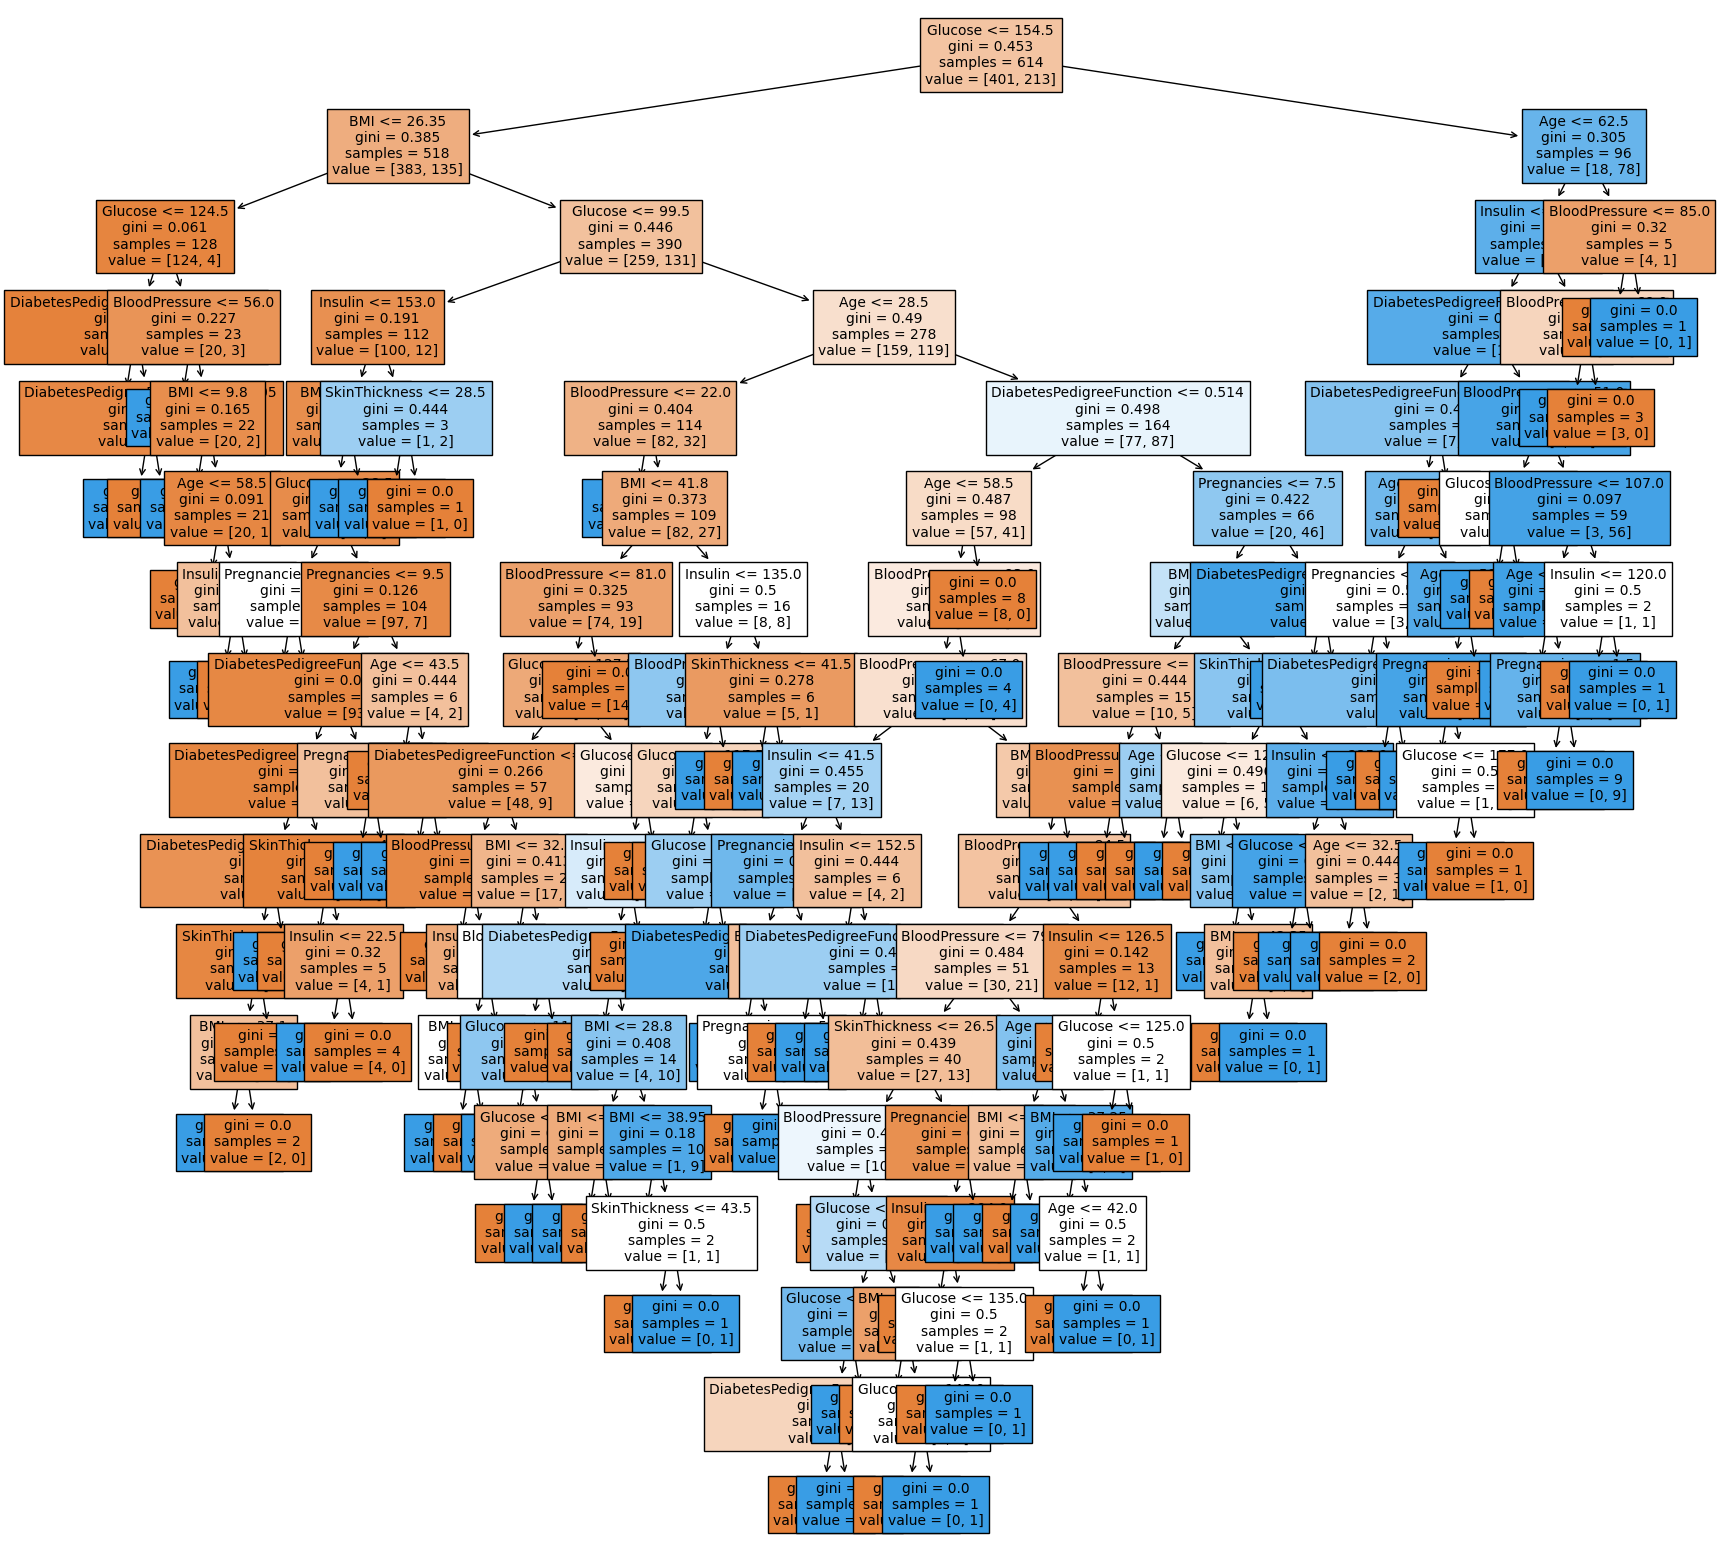

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

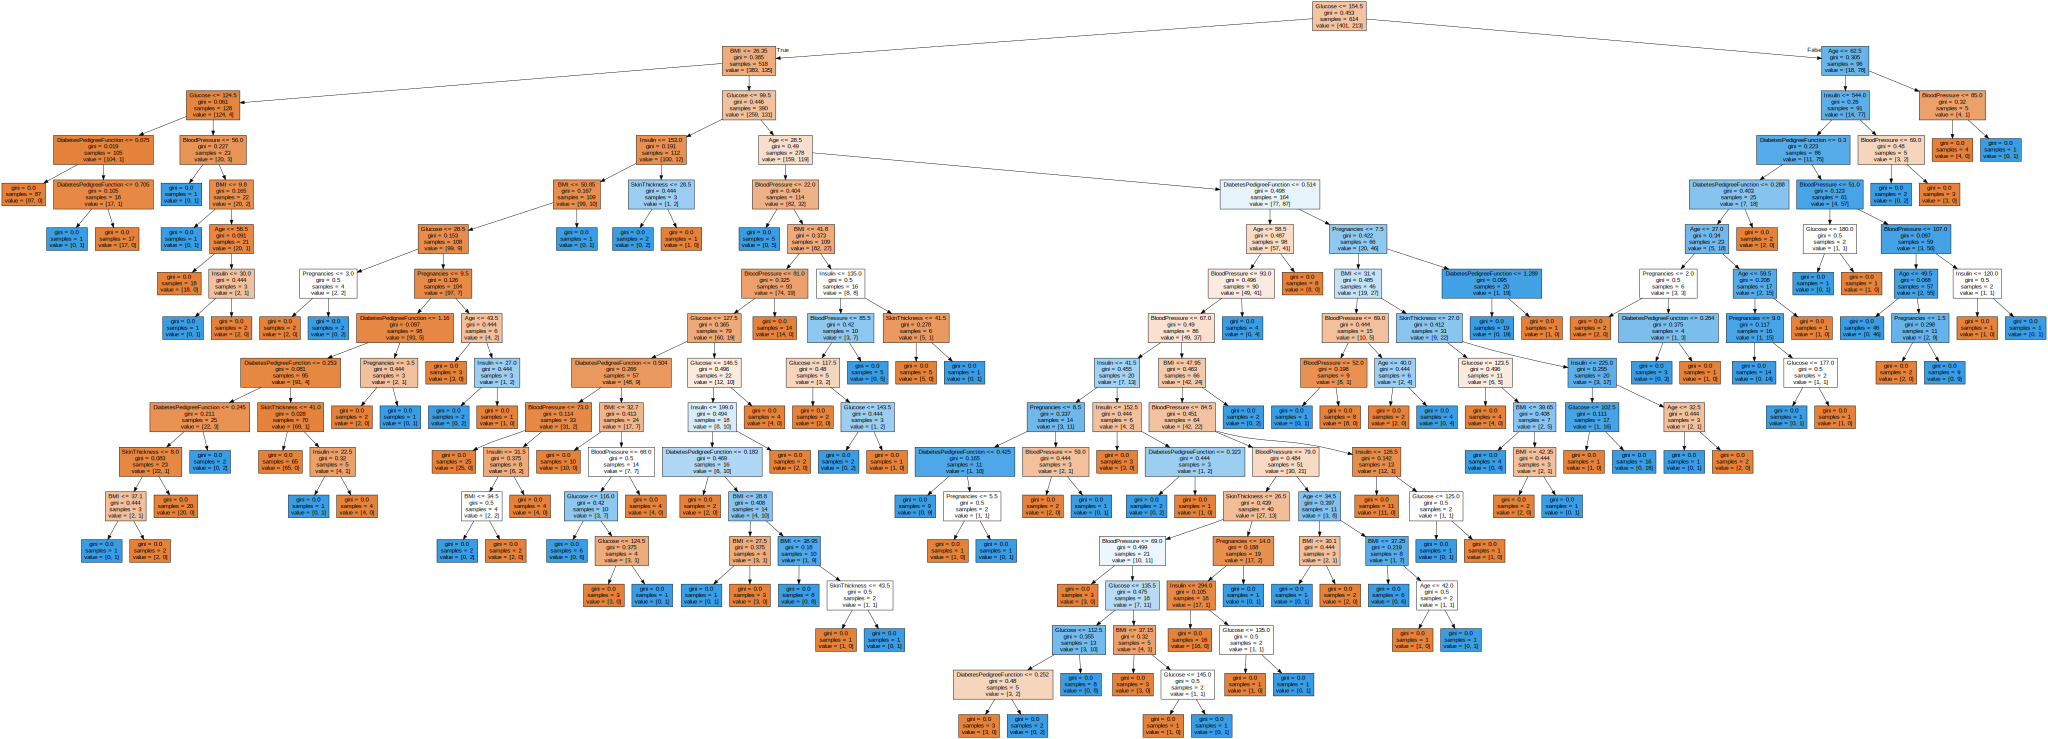

In [22]:
#graphviz를 통해 시각화
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names= feature_names, filled=True)
graphviz.Source(dot_tree)

In [23]:
#feature의 중요도를 추출
model.feature_importances_

array([0.06401291, 0.33506892, 0.13194522, 0.03833555, 0.07367234,
       0.16070503, 0.09877437, 0.09748567])

<Axes: >

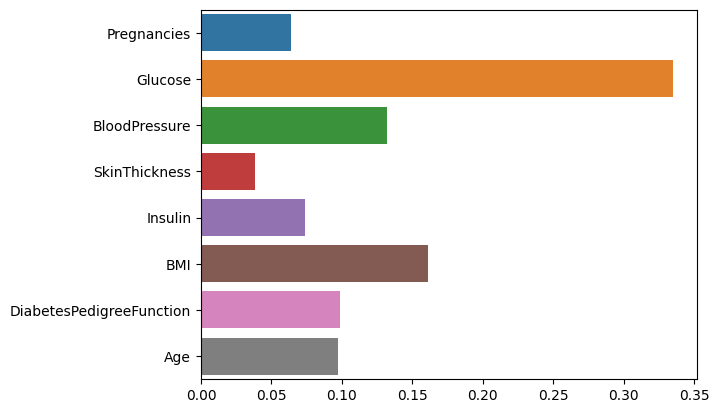

In [24]:
#feature의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

## 12. 정확도(Accuracy) 측정하기

In [31]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

diff_count = abs(y_test - y_predict).sum()
diff_count

39

In [32]:
#예측의 정확도를 구하기,
(len(y_test)-diff_count) / len(y_test) *100

74.67532467532467

In [35]:
#구현된 알고리즘을 통해 정확도 측정
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) *100

74.67532467532467

In [36]:
#model 의 score 로 점수를 계산
model.score(X_test, y_test)

0.7467532467532467